In [2]:
# Assignment 3
# KNN on thyroid dataset
# Abhay Charan Patro 
# BTECH/10021/18
# CSE B

In [3]:
# Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
# Reading the data
data=pd.read_csv("Thyroid.txt")

In [5]:
# Describing the data
data.describe()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
count,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000
mean,0.145305,0.017449,0.013325,0.032995,0.075825,0.077094,0.019987,0.030774,0.012690,0.000635,0.031409,0.852157,0.779822,0.921003,0.921320,0.921637,51.359772,0.295051,5.689591,1.992291,109.016783,0.983284,114.809613,0.091371
std,0.352464,0.130959,0.114680,0.178652,0.264760,0.266783,0.139979,0.172733,0.111952,0.025186,0.174447,0.355000,0.414432,0.269778,0.269282,0.268785,19.226176,0.456138,22.953469,1.036009,45.085350,0.234424,59.028114,0.288181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,1.400000,83.000000,0.850000,90.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000,0.000000,0.700000,1.900000,104.000000,0.960000,107.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000,1.000000,2.200000,2.400000,128.000000,1.070000,128.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,530.000000,10.200000,450.000000,2.210000,881.000000,1.000000


In [6]:
# First few entries of the data
data.head()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,80,1,1.4,0.8,105.0,0.88,120.0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,74,0,0.0,0.7,98.0,0.81,121.0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,32,0,1.4,1.1,121.0,1.11,109.0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,42,0,2.3,1.1,93.0,0.73,127.0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,89,1,0.8,0.8,111.0,0.68,165.0,1


In [7]:
# Checking for null values
flag=data.isnull().values.any()
if flag:
  print("Data contains null values")
else:
  print("Data does not contain any null value")

Data does not contain any null value


In [8]:
# Splitting the data into train and test set
X=data.iloc[:,0:23]
y=data.iloc[:,23]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [9]:
# Mean Normalizing the data 
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)
y_test=np.array(y_test)
y_train=np.array(y_train)

**METHOD 1 - Using Sci-kit Learn Library**

In [10]:
# Creating and fitting the classifier
cf = KNeighborsClassifier(n_neighbors=3)
cf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
# Testing the accuracy of the fitted model
y_pred=cf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9587955625990491

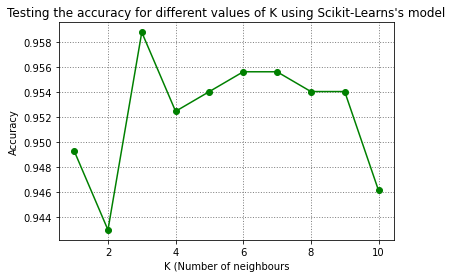

In [12]:
# Plotting the graph of accuracy with variation in k
accuracy_array = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_prediction = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_prediction)
    accuracy_array.append(accuracy)
plt.grid(color='grey', linestyle=':', linewidth=1)
plt.plot(range(1, 11), accuracy_array, color='green', marker='o')
plt.xlabel('K (Number of neighbours')
plt.ylabel('Accuracy')
plt.title("Testing the accuracy for different values of K using Scikit-Learns's model")
plt.show()

In [13]:
print("The confusion matrix for Scikit-Learn's model is ")
print(confusion_matrix(y_test,y_prediction))

The confusion matrix for Scikit-Learn's model is 
[[577   5]
 [ 29  20]]


**METHOD 2 - Writing the algorithm manually**

In [14]:
# Writing the eucledian distance function
def euclideanDistance(data1, data2):
    distance = 0
    for x in range(len(data1)):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

In [15]:
# Defining the get_neighbours function
def get_neighbours(train, test_row, num_neighbours):
	distances=[]
	for x in range(len(train)):
		dist = euclideanDistance(test_row, train[x])
		distances.append((x, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbours=[]
	for i in range(num_neighbours):
		neighbours.append(distances[i][0])
	return neighbours

In [16]:
# Defining the predic_classification function
def predict_classification(train,y_train,test_row,num_neighbours):
	neighbours = get_neighbours(train, test_row, num_neighbours)
	output_values = [y_train[x] for x in neighbours]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [17]:
# Predicting the values for k=3
y_pred_manual=[]
ctr=1
for test in X_test:
  y_pred_manual.append(predict_classification(X_train,y_train,test,3))
y_pred_manual=np.array(y_pred_manual)
accuracy_score(y_test,y_pred_manual)

0.9587955625990491

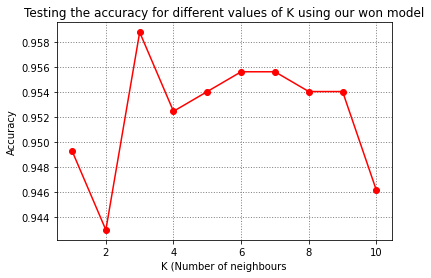

In [18]:
# Plotting the graph of accuracy with variation in k
accuracy_array_manual = []
for k in range(1, 11):
  y_prediction_manual=[]
  ctr=1
  for test in X_test:
    y_prediction_manual.append(predict_classification(X_train,y_train,test,k))
  y_prediction_manual=np.array(y_pred_manual)
  accuracy = accuracy_score(y_test, y_prediction_manual)
  accuracy_array_manual.append(accuracy)
plt.grid(color='grey', linestyle=':', linewidth=1)
plt.plot(range(1, 11), accuracy_array, color='red', marker='o')
plt.xlabel('K (Number of neighbours')
plt.ylabel('Accuracy')
plt.title('Testing the accuracy for different values of K using our won model')
plt.show()

In [ ]:
print("The confusion matrix for our manually written algo is ")
print(confusion_matrix(y_test,y_pred_manual))

As we can see that both the graphs are approximately same, hence our manually written algorithm is working well